# Heart Disease Prediction 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.neighbors import KNeighborsClassifier

In [3]:
df = pd.read_csv('/content/heart_disease_dataset.csv')

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Understanding The Data**

In [19]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [20]:
categoric_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [21]:
for i in categoric_cols:
    print('all value in column {0} : \n{1}'.format(i, df[i].value_counts().sort_index()))
    print('\n')

all value in column age : 
29     1
34     2
35     4
37     2
38     3
39     4
40     3
41    10
42     8
43     8
44    11
45     8
46     7
47     5
48     7
49     5
50     7
51    12
52    13
53     8
54    16
55     8
56    11
57    17
58    19
59    14
60    11
61     8
62    11
63     9
64    10
65     8
66     7
67     9
68     4
69     3
70     4
71     3
74     1
76     1
77     1
Name: age, dtype: int64


all value in column sex : 
0     96
1    207
Name: sex, dtype: int64


all value in column cp : 
0    143
1     50
2     87
3     23
Name: cp, dtype: int64


all value in column trestbps : 
94      2
100     4
101     1
102     2
104     1
105     3
106     1
108     6
110    19
112     9
114     1
115     3
117     1
118     7
120    37
122     4
123     1
124     6
125    11
126     3
128    12
129     1
130    36
132     8
134     5
135     6
136     3
138    13
140    32
142     3
144     2
145     5
146     2
148     2
150    17
152     5
154     1
155     1
156     

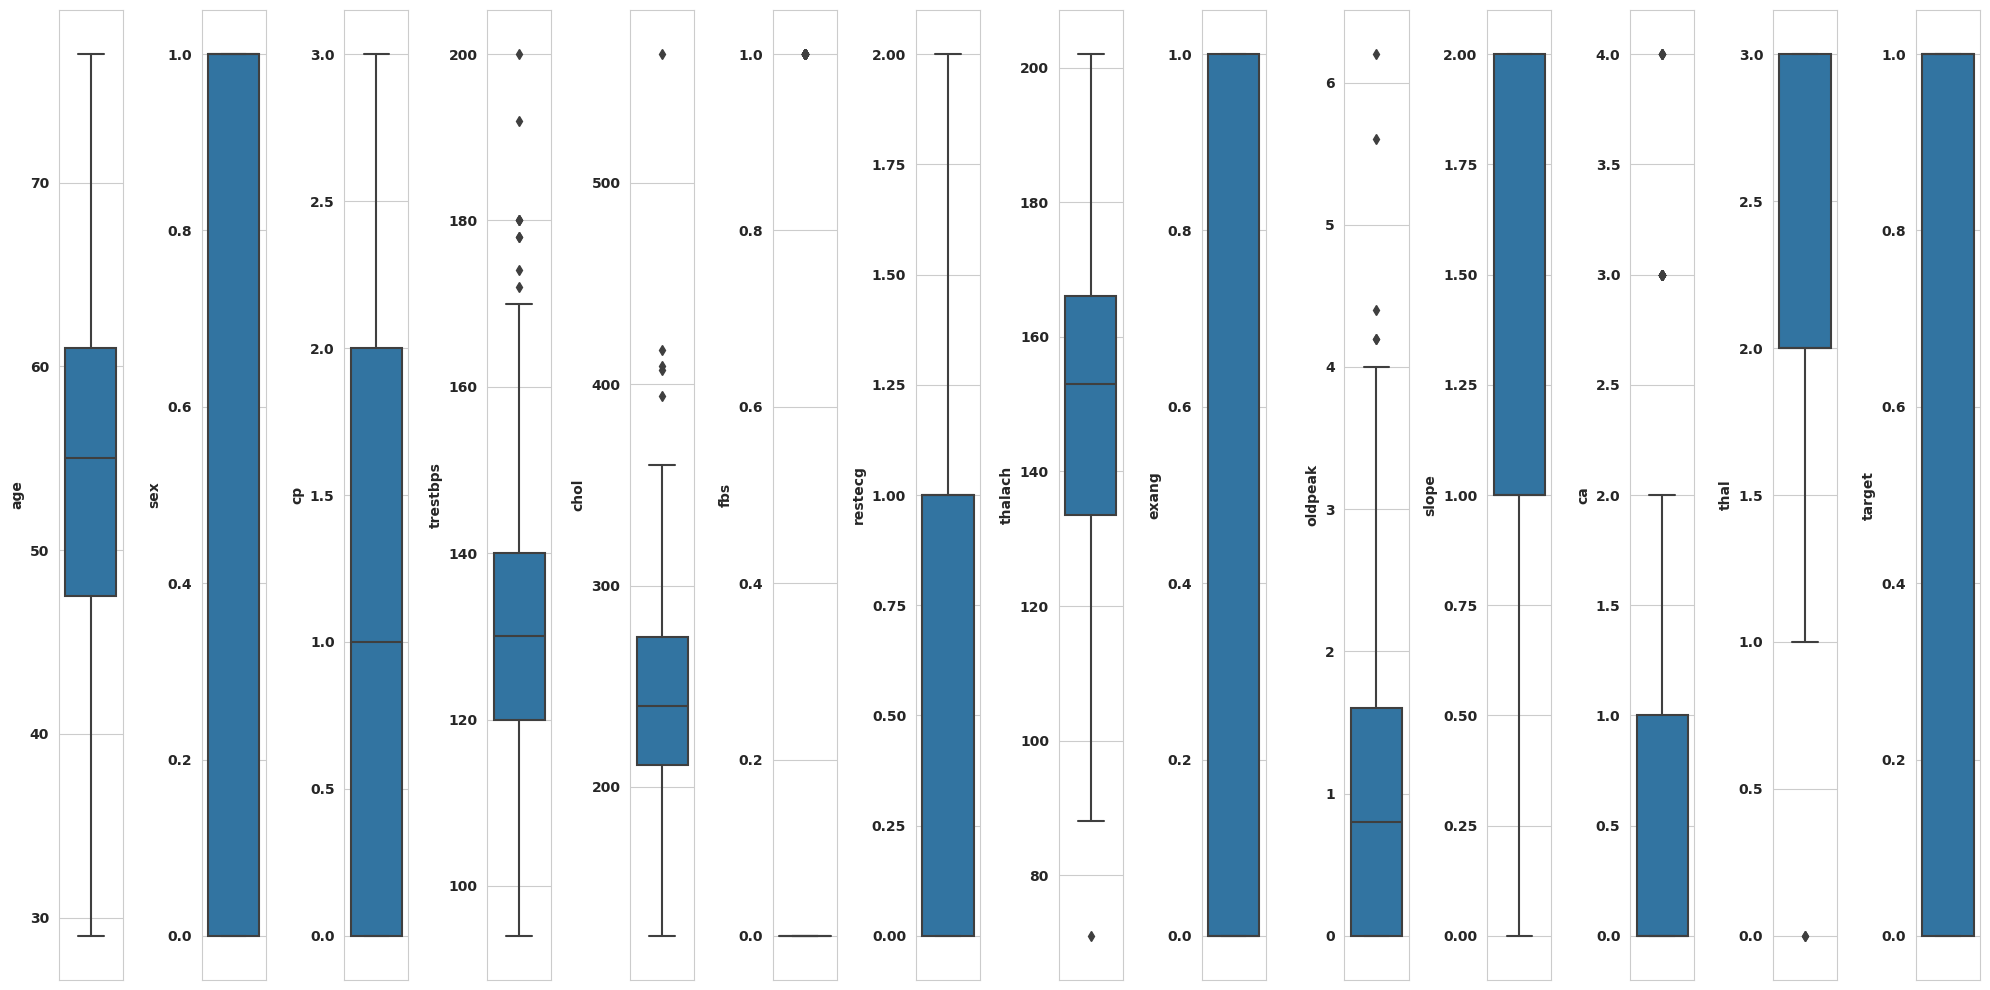

In [24]:
col_num = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
plt.figure(figsize=(20,10))
for i in range(0,len(col_num)):
    plt.subplot(1,len(col_num),i+1)
    sns.boxplot(y=df[col_num[i]])
    plt.tight_layout()

# Feature Selection

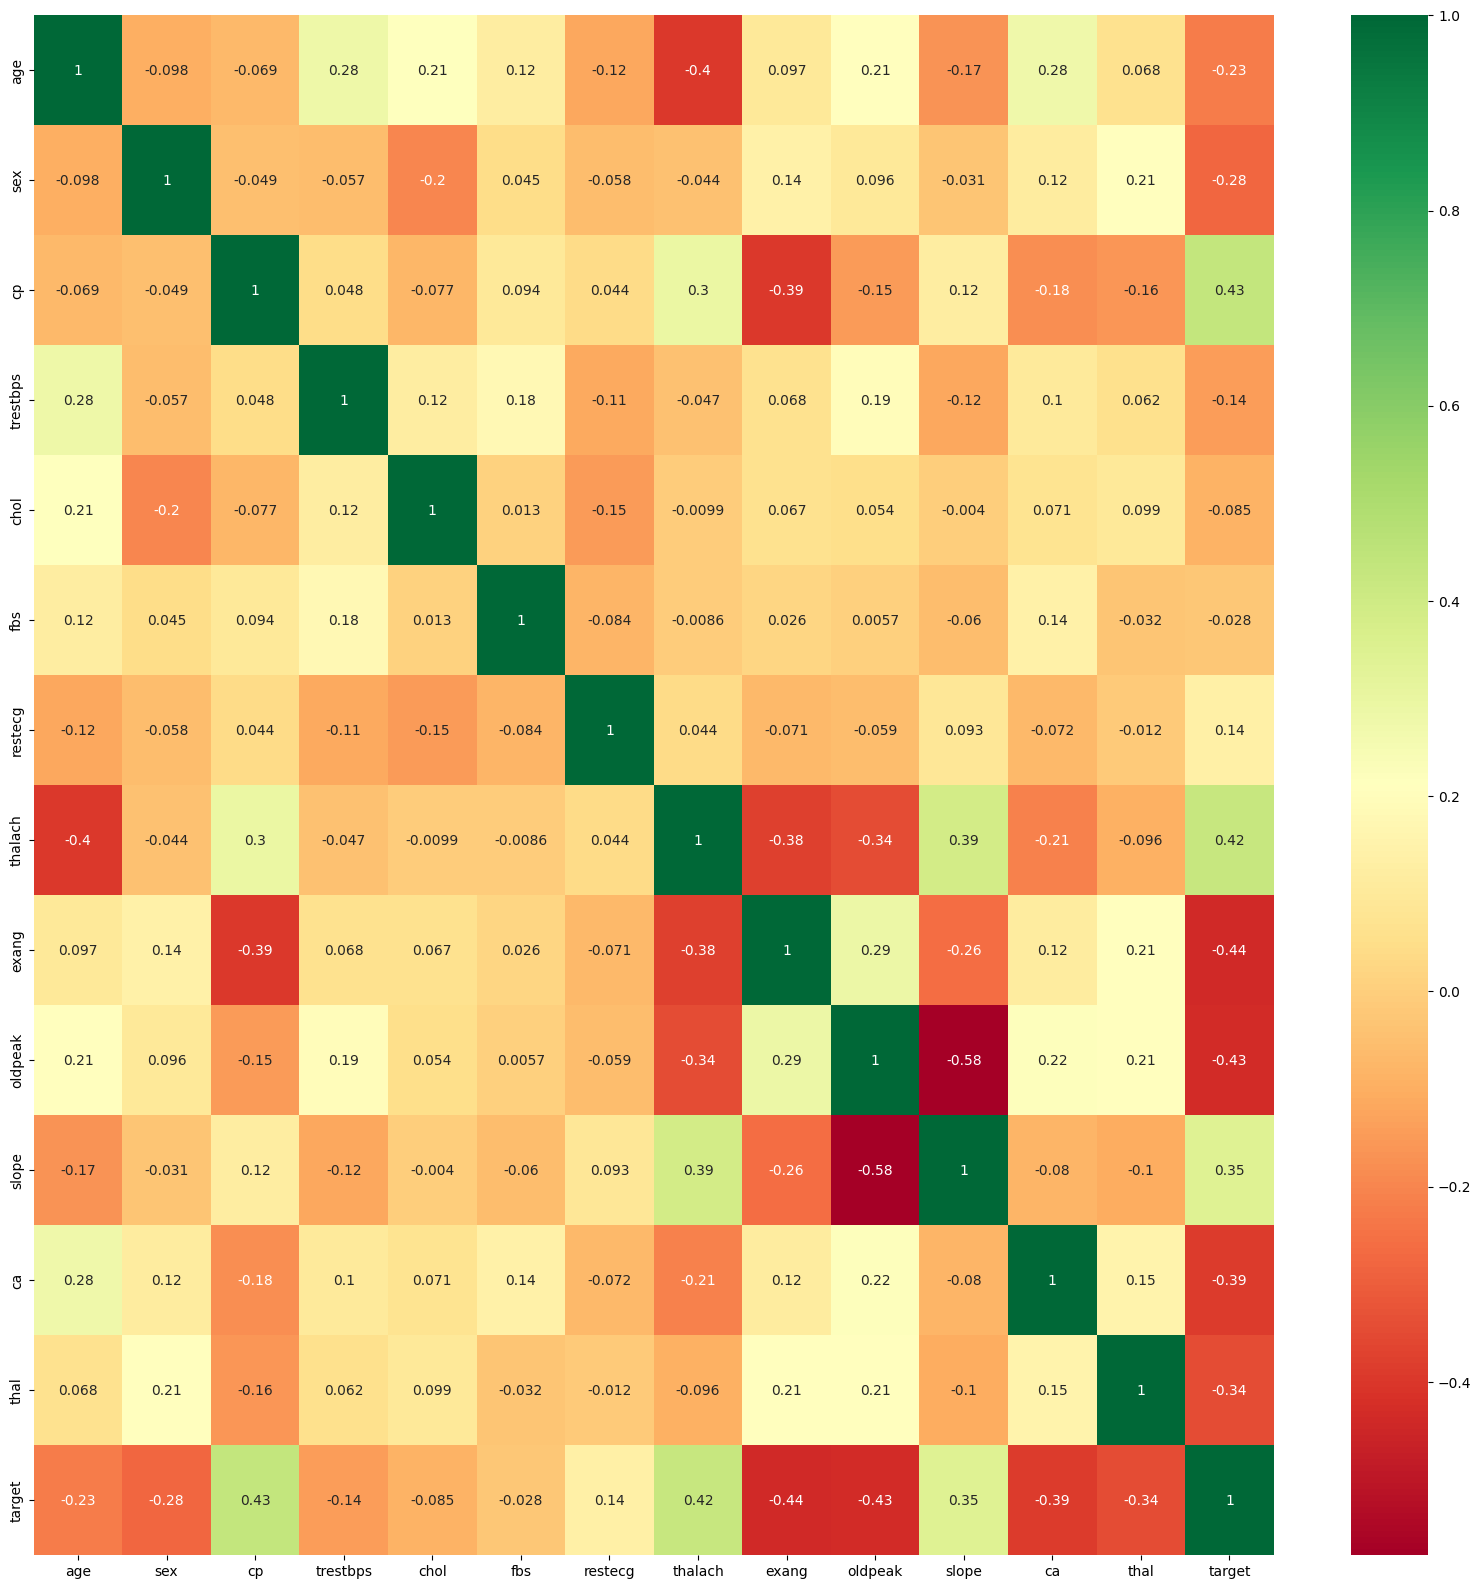

In [6]:
import seaborn as sns
#obtain the correlation of each feature in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')
plt.show()

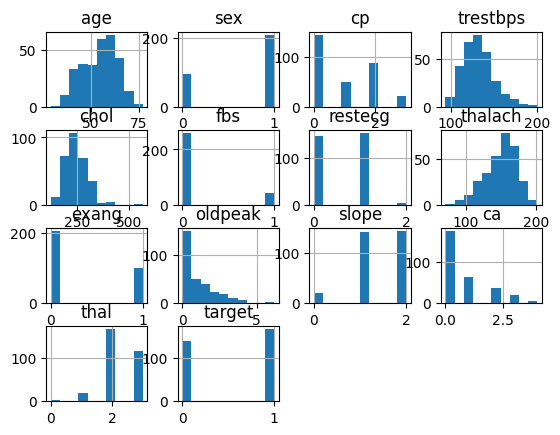

In [7]:
df.hist()
plt.show()

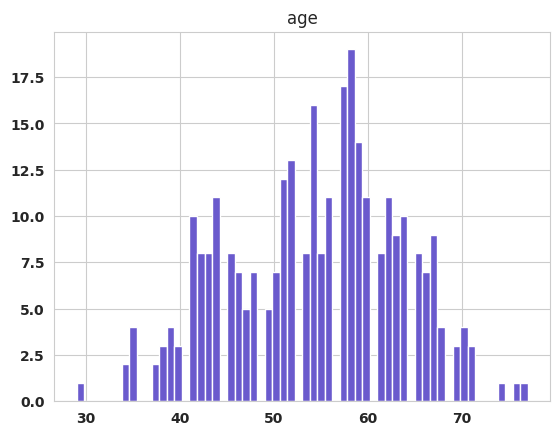

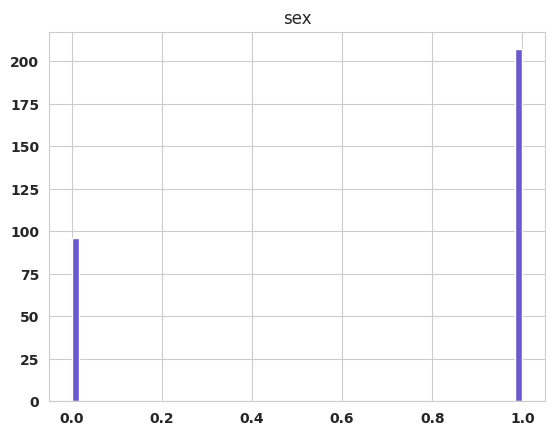

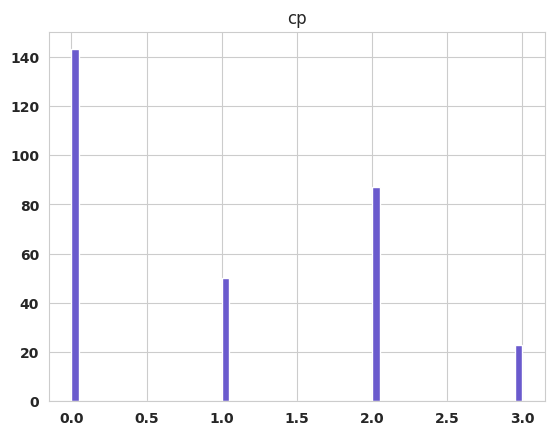

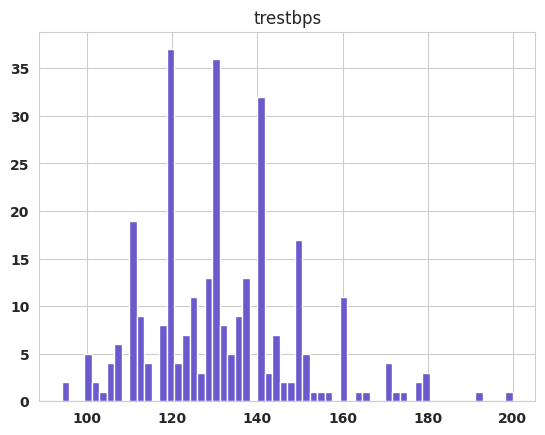

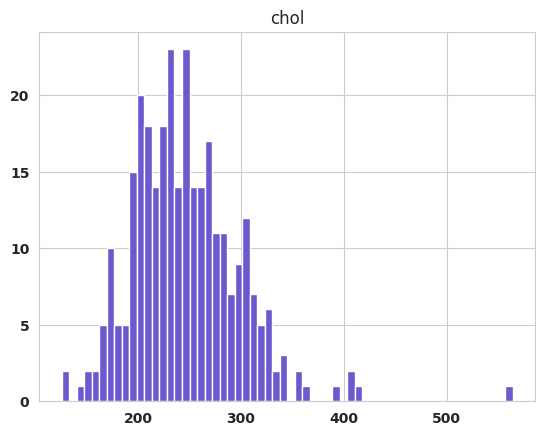

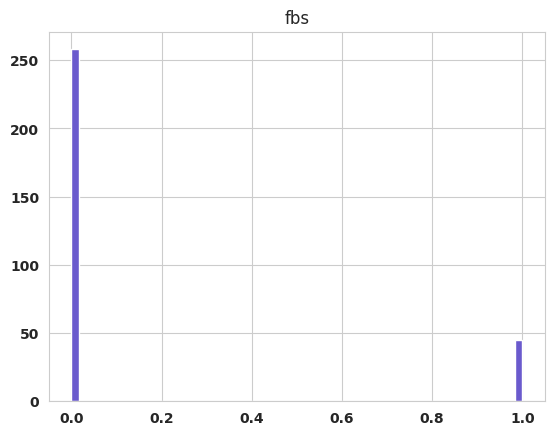

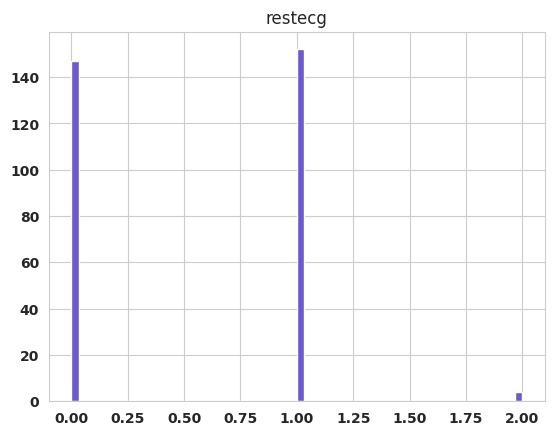

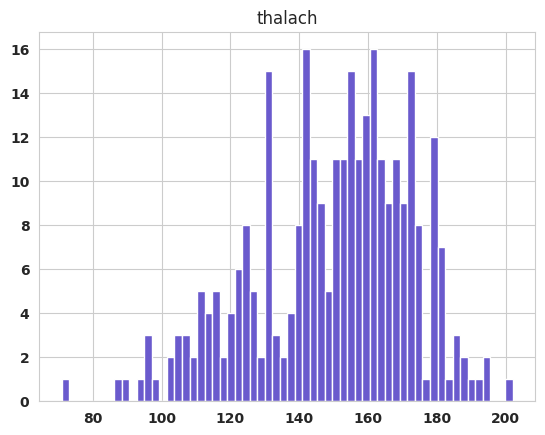

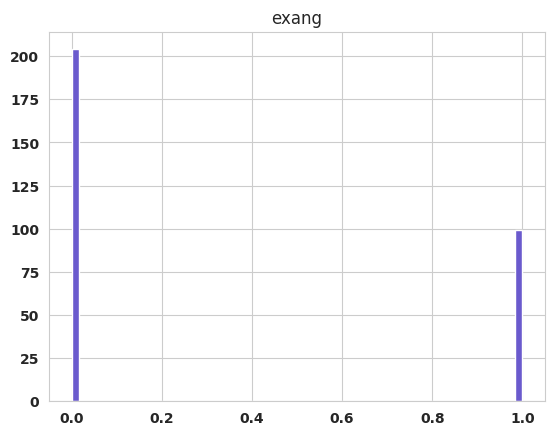

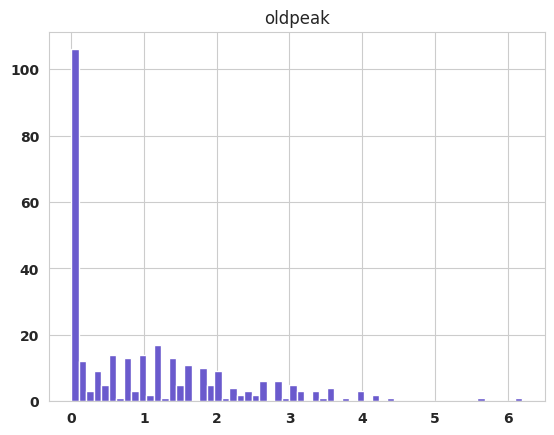

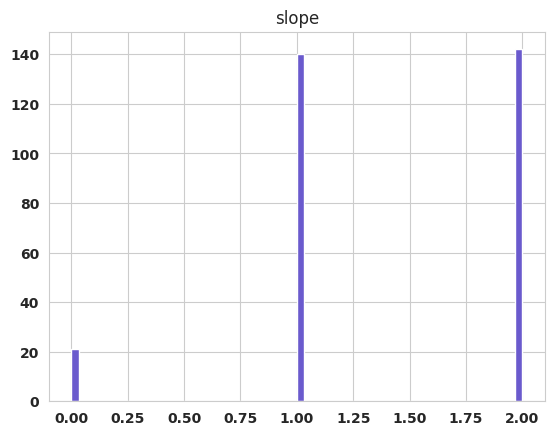

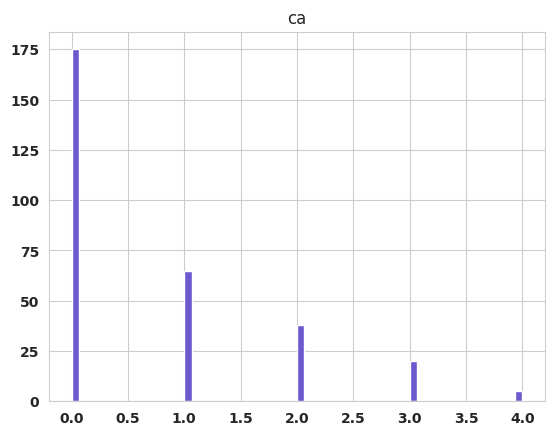

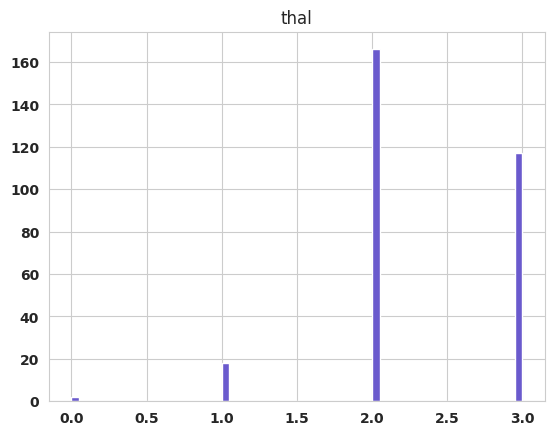

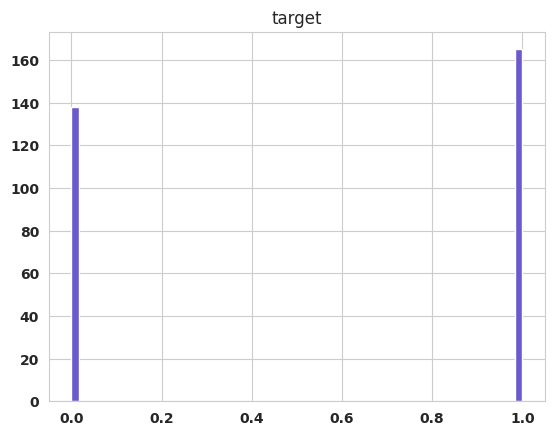

In [25]:
i = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
for j in i:
    plt.hist(df[j],bins = 60, color = 'slateblue')
    plt.title(j)
    plt.show()

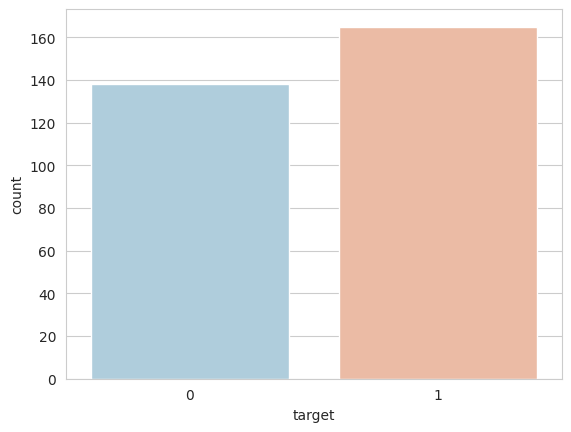

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='target',data=df,palette='RdBu_r')
plt.show()

# Data Processing

In [ ]:
# In data processing, the categorical values are converted to dummy variables and scale all the values before training the machine leraning models.

In [9]:
dataset = pd.get_dummies(df,columns = ['sex' , 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [11]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


# **Checking For MultiCollinearity**

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
pd.set_option('display.max_rows', None)
vif_data.sort_values(by= 'VIF', ascending = False) # vif limit = 11

,feature,VIF
3,trestbps,58.629045
7,thalach,47.459548
0,age,39.241186
4,chol,26.276396
12,thal,17.664200
10,slope,10.222614
13,target,4.428356
1,sex,3.682952
9,oldpeak,3.120906
2,cp,2.615083


In [28]:
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

model_params = {
    'Logistic_Regression': {
        'model': LogisticRegression(),
        'params' : {
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
    },
    'decision_tree':{
        'model':DecisionTreeClassifier(),
        'params':{
            'splitter':['best','random'],
            'max_features': ['auto', 'sqrt', 'log2'],
            'max_depth' : [4,5,6,7,8],
            'criterion' :['gini', 'entropy']
        }
    },
    'SVM_Classifier':{
        'model' : SVC(),
        'params':{
            'kernel' : ['rbf','poly','sigmoid','linear'],
            'gamma' : ['scale','auto'],
        }
    }
    }
scores = []

from sklearn.model_selection import GridSearchCV
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=3, return_train_score=False)
    clf.fit(X_train,y_train) 
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.852136,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."
1,decision_tree,0.817896,"{'criterion': 'entropy', 'max_depth': 7, 'max_..."
2,SVM_Classifier,0.842113,"{'gamma': 'auto', 'kernel': 'sigmoid'}"


In [12]:
y=dataset['target']
x=dataset.drop(['target'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0)


In [13]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

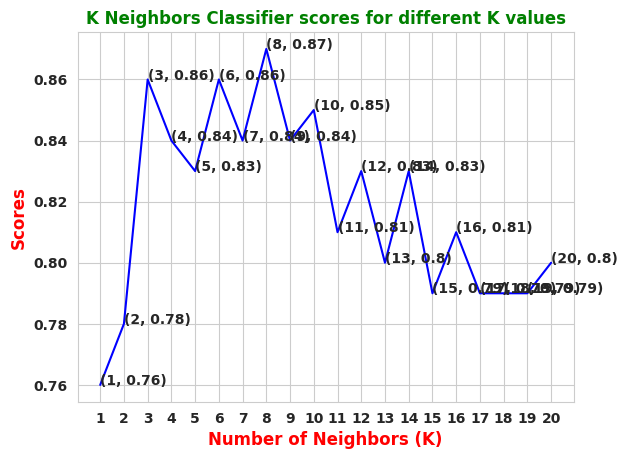

In [15]:
plt.plot([k for k in range(1,21)],knn_scores,color='blue')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)',color='Red',weight='bold',fontsize='12')
plt.ylabel('Scores',color='Red',weight='bold',fontsize='12')
plt.title('K Neighbors Classifier scores for different K values',color='Green',weight='bold',fontsize='12')
plt.show()
plt.rcParams["font.weight"]= "bold"
plt.rcParams["axes.labelweight"] = "bold"

In [16]:
from sklearn.model_selection import cross_val_score
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score=cross_val_score(knn_classifier,x,y,cv=10)

In [17]:
score.mean()

0.8448387096774195

# **Evaluation and Comparison with Other Model**

1. Logistic Regression Model

In [29]:
best.best_params[0]

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [30]:
model = LogisticRegression(solver = 'saga',
                           penalty = 'l1',
                           multi_class = 'auto')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

[[41  7]
 [ 8 44]]


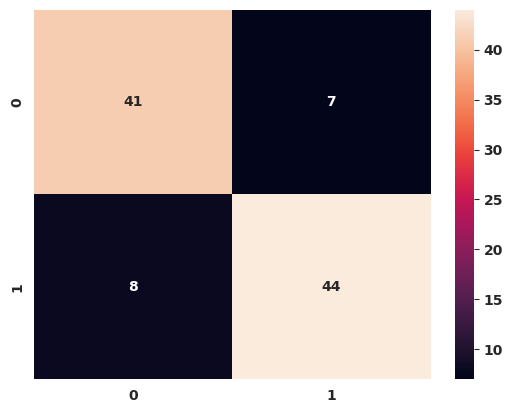



Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.86      0.85      0.85        52

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



In [31]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

2. Random Forest

In [32]:
best.best_params[1] 

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'splitter': 'random'}

In [33]:
model = DecisionTreeClassifier(criterion = 'gini',
                               max_depth = 5,
                               max_features = 'log2',
                               splitter = 'best')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

[[39  9]
 [ 9 43]]


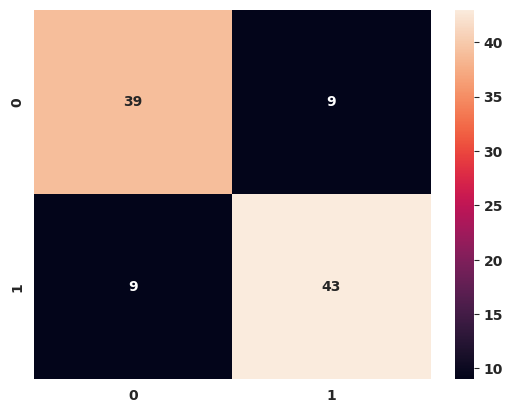



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.83      0.83      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [38]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))

3. SVM Model

In [35]:
best.best_params[2]

{'gamma': 'auto', 'kernel': 'sigmoid'}

In [36]:
model = SVC(gamma = 'auto', kernel = 'rbf')
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

[[39  9]
 [ 9 43]]


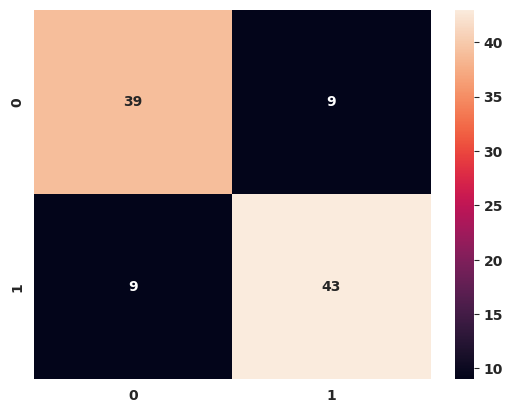



Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.83      0.83      0.83        52

    accuracy                           0.82       100
   macro avg       0.82      0.82      0.82       100
weighted avg       0.82      0.82      0.82       100



In [37]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_predict), annot = True)
plt.show()

from sklearn.metrics import classification_report
print('\n')
print('Classification Report:')
print(classification_report(y_test, y_predict))